<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/Count_based_word_Representation_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

자연어 처리에서 텍스트를 표현하는 방법으로는 여러가지 방법이 있습니다. 이번 챕터에서는 그 중 정보 검색과 텍스트 마이닝 분야에서 주로 사용되는 카운트 기반의 텍스트 표현 방법인 **DTM(Document Term Matrix)**과 **TF-IDF(Term Frequency-Inverse Document Frequency)**에 대해서 다룹니다.

텍스트를 위와 같은 방식으로 수치화를 하고나면, 통계적인 접근 방법을 통해 여러 문서로 이루어진 텍스트 데이터가 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내거나, 문서의 핵심어 추출, 검색 엔진에서 검색 결과의 순위 결정, 문서들 간의 유사도를 구하는 등의 용도로 사용할 수 있습니다.



# 1. 다양한 단어의 표현 방법

여기서는 카운트 기반의 단어 표현 방법 외에도 다양한 단어의 표현 방법에는 어떤 것이 있으며, 앞으로 이 책에서는 어떤 순서로 단어 표현 방법을 학습하게 될 것인지에 대해서 먼저 설명합니다.



## 1) 단어의 표현 방법

단어의 표현 방법은 크게 **국소 표현(Local Representation) 방법**과 **분산 표현(Distributed Representation) 방법**으로 나뉩니다. 국소 표현 방법은 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현하는 방법이며, 분산 표현 방법은 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법입니다.

예를 들어 puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여한다면 이는 국소 표현 방법에 해당됩니다. 반면, 분산 표현 방법의 예를 하나 들어보면 해당 단어를 표현하기 위해 주변 단어를 참고합니다. puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의합니다. 이렇게 되면 이 두 방법의 차이는 국소 표현 방법은 단어의 의미, 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있게 됩니다.

또한 비슷한 의미로 국소 표현 방법(Local Representation)을 이산 표현(Discrete Representation)이라고도 하며, 분산 표현(Distributed Representation)을 연속 표현(Continuous Represnetation)이라고도 합니다.

추가 의견으로 구글의 연구원 토마스 미코로브(Tomas Mikolov)는 2016년에 한 발표에서 잠재 의미 분석(LSA)이나 잠재 디리클레 할당(LDA)과 같은 방법들은 단어의 의미를 표현할 수 있다는 점에서 연속 표현(Continuous Represnetation)이지만, 엄밀히 말해서 다른 접근의 방법론을 사용하고 있는 워드투벡터(Word2vec)와 같은 분산 표현(Distributed Representation)은 아닌 것으로 분류하여 연속 표현을 분산 표현을 포괄하고 있는 더 큰 개념으로 설명하기도 했습니다.



## 2) 단어 표현의 카테고리화

이 책에서는 아래와 같은 기준으로 단어 표현을 카테고리화하여 작성되었습니다.

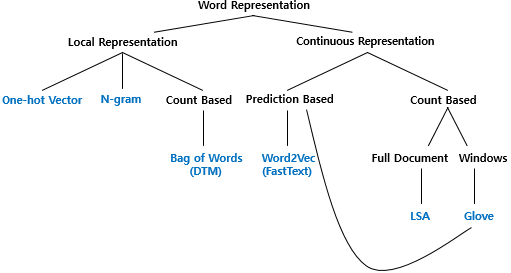

이번 챕터의 Bag of Words는 국소 표현에(Local Representation)에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법입니다. 이 챕터에서는 BoW와 그의 확장인 DTM(또는 TDM)에 대해서 학습하고, 이러한 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해서 학습합니다.

워드 임베딩 챕터에서는 연속 표현(Continuous Representation)에 속하면서, 예측(prediction)을 기반으로 단어의 뉘앙스를 표현하는 워드투벡터(Word2Vec)와 그의 확장인 패스트텍스트(FastText)를 학습하고, 예측과 카운트라는 두 가지 방법이 모두 사용된 글로브(GloVe)에 대해서 학습합니다.




# 2. Bag of Words(BoW)

단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법인 Bag of Words에 대해서 학습합니다.



## 1) Bag of Words란?

**Bag of Words**란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다. Bag of Words를 직역하면 단어들의 가방이라는 의미입니다. 단어들이 들어있는 가방을 상상해봅시다. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그 후에는 이 가방을 흔들어 단어들을 섞습니다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

BoW를 만드는 과정을 이렇게 두 가지 과정으로 생각해보겠습니다.



```
(1) 각 단어에 고유한 정수 인덱스를 부여합니다.  # 단어 집합 생성.
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.  
```

한국어 예제를 통해서 BoW에 대해서 이해해보도록 하겠습니다.

**문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.**

문서1에 대해서 BoW를 만들어보겠습니다. 아래의 함수는 입력된 문서에 대해서 단어 집합(vocaburary)을 만들어 각 단어에 정수 인덱스를 할당하고, BoW를 만듭니다.



In [2]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 64.3 MB/s 


In [3]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)
  
  word_to_index = {}
  bow = []

  for word in tokenized_document:
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장하는 단어는 해당하는 인덱스 위치에 1을 더한다
      bow[index] = bow[index] + 1
  return word_to_index, bow

해당 함수에 문서1을 입력으로 넣어봅시다.



In [4]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


문서1에 각 단어에 대해서 인덱스를 부여한 결과는 첫번째 출력 결과입니다. 문서1의 BoW는 두번째 출력 결과입니다. 두번째 출력 결과를 보면, 인덱스 4에 해당하는 물가상승률은 두 번 언급되었기 때문에 인덱스 4에 해당하는 값이 2임입니다. 인덱스는 0부터 시작됨에 주의합니다. 다시 말해 물가상승률은 BoW에서 다섯번째 값입니다. 만약, 한국어에서 불용어에 해당되는 조사들 또한 제거한다면 더 정제된 BoW를 만들 수도 있습니다.



## 2) Bag of Words의 다른 예제들

**문서2 : 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.**

위의 함수에 임의의 문서2를 입력으로 하여 결과를 확인해봅시다.

In [5]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


문서1과 문서2를 합쳐서 문서 3이라고 명명하고, BoW를 만들 수도 있습니다.

**문서3: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.**



In [6]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


문서3의 단어 집합은 문서1과 문서2의 단어들을 모두 포함하고 있는 것들을 볼 수 있습니다. BoW는 종종 여러 문서의 단어 집합을 합친 뒤에, 해당 단어 집합에 대한 각 문서의 BoW를 구하기도 합니다. 가령, 문서3에 대한 단어 집합을 기준으로 문서1, 문서2의 BoW를 만든다고 한다면 결과는 아래와 같습니다.



```
문서3 단어 집합에 대한 문서1 BoW : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  
문서3 단어 집합에 대한 문서2 BoW : [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1]  
```

문서3 단어 집합에서 물가상승률이라는 단어는 인덱스가 4에 해당됩니다. 물가상승률이라는 단어는 문서1에서는 2회 등장하며, 문서2에서는 1회 등장하였기 때문에 두 BoW의 인덱스 4의 값은 각각 2와 1이 되는 것을 볼 수 있습니다.

BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이므로 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다. 즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다. 가령, '달리기', '체력', '근력'과 같은 단어가 자주 등장하면 해당 문서를 체육 관련 문서로 분류할 수 있을 것이며, '미분', '방정식', '부등식'과 같은 단어가 자주 등장한다면 수학 관련 문서로 분류할 수 있습니다.






## 3) CountVectorizer 클래스로 BoW 만들기

사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원합니다. 이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있습니다. CountVectorizer로 간단하고 빠르게 BoW를 만드는 실습을 진행해보도록 하겠습니다.



In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있습니다. 또한 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문입니다. 정제(Cleaning) 챕터에서 언급했듯이, 영어에서는 길이가 짧은 문자를 제거하는 것 또한 전처리 작업으로 고려되기도 합니다.

주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점입니다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미합니다.

예를 들어, 앞서 BoW를 만드는데 사용했던 '정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.' 라는 문장을 CountVectorizer를 사용하여 BoW로 만들 경우, CountVectorizer는 '물가상승률'이라는 단어를 인식하지 못 합니다. CountVectorizer는 띄어쓰기를 기준으로 분리한 뒤에 '물가상승률과'와 '물가상승률은' 으로 조사를 포함해서 하나의 단어로 판단하기 때문에 서로 다른 두 단어로 인식합니다. 그리고 '물가상승률과'와 '물가상승률은'이 각자 다른 인덱스에서 1이라는 빈도의 값을 갖게 됩니다.



## 4) 불용어를 제거한 BoW 만들기

앞서 불용어는 자연어 처리에서 별로 의미를 갖지 않는 단어들이라고 언급한 바 있습니다. BoW를 사용한다는 것은 그 문서에서 각 단어가 얼마나 자주 등장했는지를 보겠다는 것입니다. 그리고 각 단어에 대한 빈도수를 수치화 하겠다는 것은 결국 텍스트 내에서 어떤 단어들이 중요한지를 보고싶다는 의미를 함축하고 있습니다. 그렇다면 BoW를 만들때 불용어를 제거하는 일은 자연어 처리의 정확도를 높이기 위해서 선택할 수 있는 전처리 기법입니다.

영어의 BoW를 만들기 위해 사용하는 CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원하고 있습니다.



In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

### (1) 사용자가 직접 정의한 불용어 사용

In [10]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words = ['the', 'a', 'an', 'is', 'not'])
print('bag of words vector :', vect.fit_transform(text).toarray())
print('vocabulary :', vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


### (2) CountVectorizer에서 제공하는 자체 불용어 사용

In [11]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words='english')
print('bag of words vector :', vect.fit_transform(text).toarray())
print('vocabulary :', vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


### (3) NLTK에서 지원하는 불용어 사용

In [14]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words('english')
vect = CountVectorizer(stop_words = stop_words)
print('bag of words vector :', vect.fit_transform(text).toarray())
print('vocabulary :', vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 3. 문서 단어 행렬(Document-Term Matrix, DTM)

서로 다른 문서들의 BoW들을 결합한 표현 방법인 **문서 단어 행렬(Document-Term Matrix, DTM)** 표현 방법을 배워보겠습니다. 이하 DTM이라고 명명합니다. 행과 열을 반대로 선택하면 TDM이라고 부르기도 합니다. 이렇게 하면 서로 다른 문서들을 비교할 수 있게 됩니다.



## 1) 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법

문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다. 쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어입니다. 예를 들어서 이렇게 4개의 문서가 있다고 합시다.



```
문서1 : 먹고 싶은 사과
문서2 : 먹고 싶은 바나나
문서3 : 길고 노란 바나나 바나나
문서4 : 저는 과일이 좋아요
```
띄어쓰기 단위 토큰화를 수행한다고 가정하고, 문서 단어 행렬로 표현하면 다음과 같습니다.

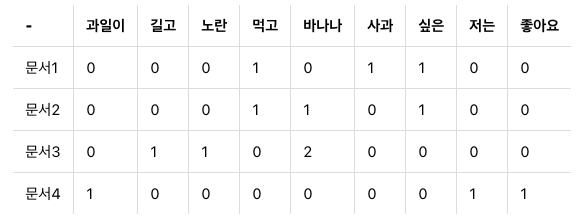

각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기합니다. 문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 갖습니다. 만약 필요에 따라서는 형태소 분석기로 단어 토큰화를 수행하고, 불용어에 해당되는 조사들 또한 제거하여 더 정제된 DTM을 만들 수도 있을 것입니다.



## 2) 문서 단어 행렬(Document-Term Matrix)의 한계

DTM은 매우 간단하고 구현하기도 쉽지만, 본질적으로 가지는 몇 가지 한계들이 있습니다.



### (1) 희소 표현(Sparse representation)

원-핫 벡터는 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 되는 벡터입니다. 원-핫 벡터는 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 점에서 단점을 가집니다. DTM도 마찬가지입니다. DTM에서의 각 행을 문서 벡터라고 해봅시다. 각 문서 벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기를 가집니다. 만약 가지고 있는 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수만 이상의 차원을 가질 수도 있습니다. 또한 많은 문서 벡터가 대부분의 값이 0을 가질 수도 있습니다. 당장 위에서 예로 들었던 문서 단어 행렬의 모든 행이 0이 아닌 값보다 0의 값이 더 많은 것을 볼 수 있습니다.

원-핫 벡터나 DTM과 같은 대부분의 값이 0인 표현을 희소 벡터(sparse vector) 또는 희소 행렬(sparse matrix)라고 부르는데, 희소 벡터는 많은 양의 저장 공간과 높은 계산 복잡도를 요구합니다. 이러한 이유로 전처리를 통해 단어 집합의 크기를 줄이는 일은 BoW 표현을 사용하는 모델에서 중요할 수 있습니다. 앞서 배운 텍스트 전처리 방법을 사용하여 구두점, 빈도수가 낮은 단어, 불용어를 제거하고, 어간이나 표제어 추출을 통해 단어를 정규화하여 단어 집합의 크기를 줄일 수 있습니다.



### (2) 단순 빈도 수 기반 접근

여러 문서에 등장하는 모든 단어에 대해서 빈도 표기를 하는 이런 방법은 때로는 한계를 가지기도 합니다. 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장할 수 밖에 없습니다. 그런데 유사한 문서인지 비교하고 싶은 문서1, 문서2, 문서3에서 동일하게 the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됩니다.

각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있습니다. 앞서 불용어(stopwords)와 같은 단어들은 빈도수가 높더라도 자연어 처리에 있어 의미를 갖지 못하는 단어라고 언급한 바 있습니다. 그렇다면 DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법은 없을까요? 이러한 아이디어를 적용한 TF-IDF를 이어서 학습해봅시다. 사이킷런의 CountVectorizer를 사용하여 DTM을 만드는 실습 또한 TF-IDF를 설명하면서 진행하겠습니다.



# 4. TF-IDF (Term Frequency-Inverse Document Frequency)

이번에는 DTM 내에 있는 각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치에 대해서 알아보겠습니다. TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 많은 정보를 고려하여 문서들을 비교할 수 있습니다. TF-IDF가 DTM보다 항상 좋은 성능을 보장하는 것은 아니지만, 많은 경우에서 DTM보다 더 좋은 성능을 얻을 수 있습니다.



## 1) TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)

**TF-IDF(Term Frequency-Inverse Document Frequency)**는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있습니다.

TF-IDF는 TF와 IDF를 곱한 값을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.



### (1) tf(d, t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수

생소한 글자때문에 어려워보일 수 있지만, 잘 생각해보면 TF는 이미 앞에서 구한 적이 있습니다. TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문입니다.



### (2) df(t) : 특정 단어 t가 등장한 문서의 수

여기서 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가집니다. 앞서 배운 DTM에서 바나나는 문서2와 문서3에서 등장했습니다. 이 경우, 바나나의 df는 2입니다. 문서3에서 바나나가 두 번 등장했지만, 그것은 중요한 게 아닙니다. 심지어 바나나란 단어가 문서2에서 100번 등장했고, 문서3에서 200번 등장했다고 하더라도 바나나의 df는 2가 됩니다.



### (3) idf(d, t) : df(t)에 반비례하는 수

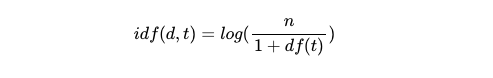

IDF라는 이름을 보고 DF의 역수가 아닐까 생각했다면, IDF는 DF의 역수를 취하고 싶은 것이 맞습니다. 그런데 log와 분모에 1을 더해주는 식에 의아하실 수 있습니다. log를 사용하지 않았을 때, IDF를 DF의 역수(n/df(t)라는 식)로 사용한다면 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지게 됩니다. 그렇기 때문에 log를 사용합니다.

왜 log가 필요한지 n=1,000,000일 때의 예를 들어봅시다. log의 밑은 10을 사용한다고 가정하였을 때 결과는 아래와 같습니다.

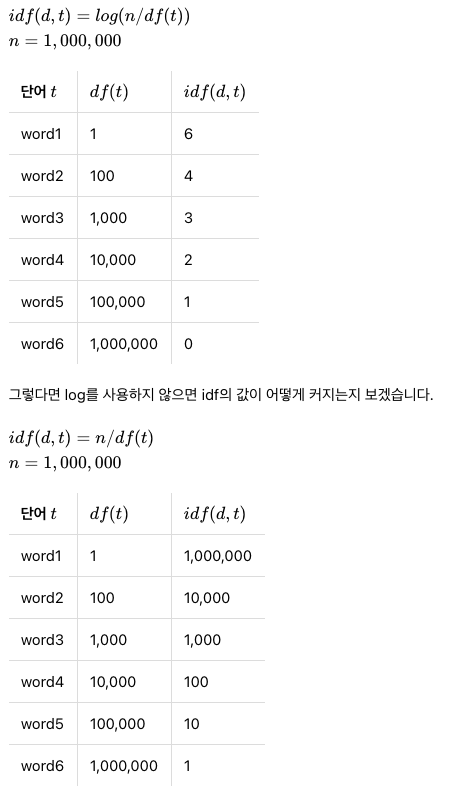



또 다른 직관적인 설명은 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장합니다. 그런데 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 또 최소 수백 배는 더 자주 등장하는 편입니다. 이 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있습니다. 로그를 씌우면 이런 격차를 줄이는 효과가 있습니다. log 안의 식에서 분모에 1을 더해주는 이유는 첫번째 이유로는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위함입니다.



TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.



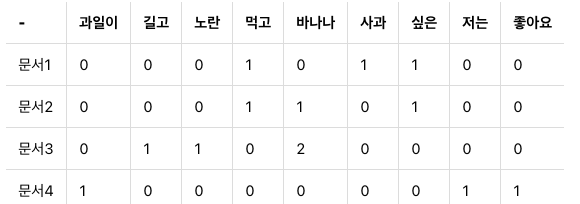

앞서 DTM을 설명하기위해 들었던 위의 예제를 가지고 TF-IDF에 대해 이해해보겠습니다. 우선 TF는 앞서 사용한 DTM을 그대로 사용하면, 그것이 각 문서에서의 각 단어의 TF가 됩니다. 이제 구해야할 것은 TF와 곱해야할 값인 IDF입니다. 로그는 자연 로그를 사용하도록 하겠습니다. 자연 로그는 로그의 밑을 자연 상수 e(e=2.718281...)를 사용하는 로그를 말합니다. IDF 계산을 위해 사용하는 로그의 밑은 TF-IDF를 사용하는 사용자가 임의로 정할 수 있는데, 여기서 로그는 마치 기존의 값에 곱하여 값의 크기를 조절하는 상수의 역할을 합니다. 각종 프로그래밍 언어에서 패키지로 지원하는 TF-IDF의 로그는 대부분 자연 로그를 사용합니다. 여기서도 자연 로그를 사용하겠습니다. 자연 로그는 보통 log라고 표현하지 않고, ln이라고 표현합니다.



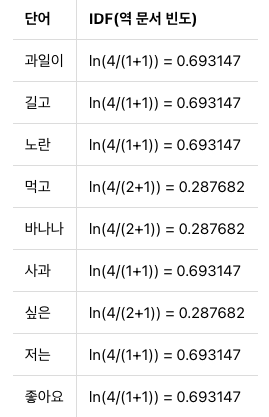

문서의 총 수는 4이기 때문에 ln 안에서 분자는 늘 4으로 동일합니다. 분모의 경우에는 각 단어가 등장한 문서의 수(DF)를 의미하는데, 예를 들어서 '먹고'의 경우에는 총 2개의 문서(문서1, 문서2)에 등장했기 때문에 2라는 값을 가집니다. 각 단어에 대해서 IDF의 값을 비교해보면 문서 1개에만 등장한 단어와 문서2개에만 등장한 단어는 값의 차이를 보입니다. IDF는 여러 문서에서 등장한 단어의 가중치를 낮추는 역할을 하기 때문입니다.



TF-IDF를 계산해보겠습니다. 각 단어의 TF는 DTM에서의 각 단어의 값과 같으므로, 앞서 사용한 DTM에서 단어 별로 위의 IDF값을 곱해주면 TF-IDF 값을 얻습니다.

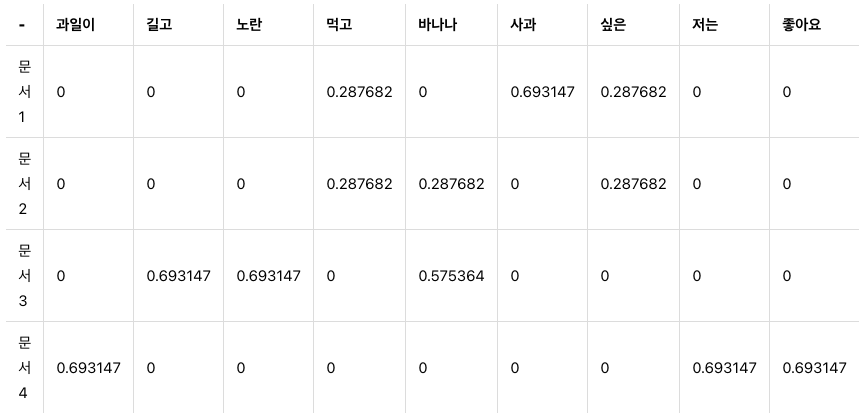

사실 예제 문서가 굉장히 간단하기 때문에 계산은 매우 쉽습니다. 문서3에서의 바나나만 TF 값이 2이므로 IDF에 2를 곱해주고, 나머진 TF 값이 1이므로 그대로 IDF 값을 가져오면 됩니다. 문서2에서의 바나나의 TF-IDF 가중치와 문서3에서의 바나나의 TF-IDF 가중치가 다른 것을 볼 수 있습니다. 수식적으로 말하면, TF가 각각 1과 2로 달랐기 때문인데 TF-IDF에서의 관점에서 보자면 TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서 내에서 중요한 단어로 판단하기 때문입니다. 문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단하는 것입니다.



## 2) 파이썬으로 TF-IDF 직접 구현하기

위의 계산 과정을 파이썬으로 직접 구현해보겠습니다. 앞의 설명에서 사용한 4개의 문서를 docs에 저장합니다.

In [18]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [19]:
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현합니다.



In [21]:
# 총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t, d) * idf(t)

TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력해보겠습니다.



In [22]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [23]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


정상적으로 DTM이 출력되었습니다. 각 단어에 대한 IDF 값을 구해봅시다.



In [24]:
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


위에서 수기로 구한 IDF 값들과 정확히 일치합니다. TF-IDF 행렬을 출력해봅시다.



In [26]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


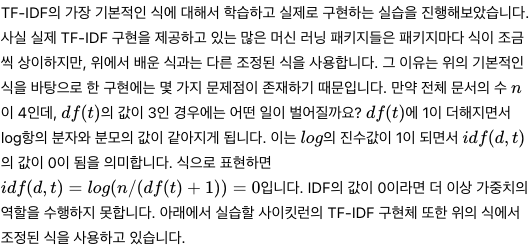